## **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Loading Data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = '/content/gdrive/MyDrive/Bathymetry/dataset_29SMD/02555_29SMD_20190314.npy'

x = np.load(path)                                   #loading data from gdrive
print(type(x))
print('dimensions : ',x.ndim)
print('shape : ', x.shape)

<class 'numpy.ndarray'>
dimensions :  3
shape :  (40, 40, 4)


## **Displaying Image**

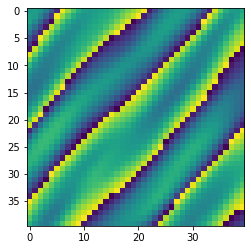

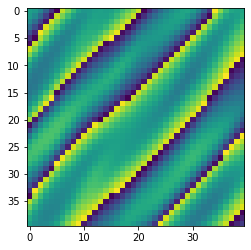

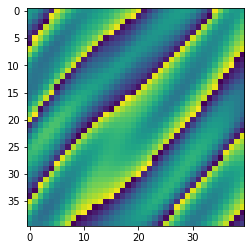

In [ ]:
im = Image.fromarray((x*255).astype(np.uint8))       #converting a numpy array into Image
im = im.convert('RGB')                               #converting each pixel to the triple 8-bit value 
final = Image.Image.split(im)                        #splitting the image into 3 individual bands
plt.imshow(final[0])
plt.show()
plt.imshow(final[1])
plt.show()
plt.imshow(final[2])
plt.show()

# **NN Model**

Importing required packages

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, ReLU
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose, concatenate, Dropout
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd

In [ ]:
path = '/content/gdrive/MyDrive/Bathymetry'

Getting training data

In [ ]:
train_list = pd.read_csv(path + '/x_y_z_b2_b3_b4_b8_csv.csv')
train_list

,x,y,elev,b2,b3,b4,b8,xrel,yrel
0,453856.40,2613146.81,237.72,1203,930,620,429,0.00,0.00
1,453846.17,2613145.40,237.73,1214,952,609,437,-10.23,-1.41
2,453830.51,2613115.92,237.74,1205,945,615,420,-15.66,-29.48
3,453886.47,2612795.40,237.75,1179,908,574,353,55.96,-320.52
4,453828.02,2613083.49,237.76,1192,926,619,399,-58.45,288.09
...,...,...,...,...,...,...,...,...,...
3968,455588.35,2601934.01,278.37,1160,922,660,442,-4125.74,8750.22
3969,459726.09,2593190.54,278.38,1199,955,666,408,4137.74,-8743.47
3970,456390.71,2599870.79,278.48,1165,919,636,420,-3335.38,6680.25
3971,455593.88,2601925.54,278.50,1159,930,689,455,-796.83,2054.75


In [ ]:
 mean_x = np.mean(train_list['x'])
 mean_y = np.mean(train_list['y'])
 train_list['xrel'] = train_list['x']-mean_x
 train_list['yrel'] = train_list['y']-mean_y
 train_list

,x,y,elev,b2,b3,b4,b8,xrel,yrel
0,453856.40,2613146.81,237.72,1203,930,620,429,-679.744855,5625.411314
1,453846.17,2613145.40,237.73,1214,952,609,437,-689.974855,5624.001314
2,453830.51,2613115.92,237.74,1205,945,615,420,-705.634855,5594.521314
3,453886.47,2612795.40,237.75,1179,908,574,353,-649.674855,5274.001314
4,453828.02,2613083.49,237.76,1192,926,619,399,-708.124855,5562.091314
...,...,...,...,...,...,...,...,...,...
3968,455588.35,2601934.01,278.37,1160,922,660,442,1052.205145,-5587.388686
3969,459726.09,2593190.54,278.38,1199,955,666,408,5189.945145,-14330.858686
3970,456390.71,2599870.79,278.48,1165,919,636,420,1854.565145,-7650.608686
3971,455593.88,2601925.54,278.50,1159,930,689,455,1057.735145,-5595.858686


In [ ]:
training = train_list[['b2','b3','b4','b8']]
labels = train_list['elev']
print(training)
print(labels)

        b2    b3    b4    b8
0     1203   930   620   429
1     1214   952   609   437
2     1205   945   615   420
3     1179   908   574   353
4     1192   926   619   399
...    ...   ...   ...   ...
3968  1160   922   660   442
3969  1199   955   666   408
3970  1165   919   636   420
3971  1159   930   689   455
3972  1333  1100  1055  1075

[3973 rows x 4 columns]
0       237.72
1       237.73
2       237.74
3       237.75
4       237.76
         ...  
3968    278.37
3969    278.38
3970    278.48
3971    278.50
3972    278.87
Name: elev, Length: 3973, dtype: float64


In [ ]:
type(labels)

pandas.core.series.Series

In [ ]:
labels = np.asarray(labels).reshape(-1,1)
labels

array([[237.72],
       [237.73],
       [237.74],
       ...,
       [278.48],
       [278.5 ],
       [278.87]])

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# # min_max_scaler = preprocessing.MinMaxScaler()
# # training = min_max_scaler.fit_transform(training)
# # lab_mean = np.mean(labels)
# # lab_var = np.var(labels)
# # labels = (labels- lab_mean)/lab_var

# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# print(scaler_x.fit(training))
# training=scaler_x.transform(training)
# print(training)
# print(scaler_y.fit(labels))
# labels=scaler_y.transform(labels)
# print(labels)

In [ ]:
from sklearn.model_selection import train_test_split

training=pd.DataFrame(training,columns=['b2','b3','b4','b8'])

X_train, X_rem, y_train, y_rem = train_test_split(training, labels, test_size=0.3, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

print(np.shape(X_train),'\n',np.shape(y_train),'\n',np.shape(X_test),'\n',np.shape(y_test),'\n',np.shape(X_valid),'\n',np.shape(y_valid))

# X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2)

(2781, 4) 
 (2781,) 
 (596, 4) 
 (596,) 
 (596, 4) 
 (596,)


In [ ]:
check_for_nan = X_test['b2'].isnull().values.any()
print (check_for_nan)

False


In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=4, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
# model.add(Dense(12, input_dim=6, kernel_initializer='normal', activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 6)                 30        
                                                                 
 dense_19 (Dense)            (None, 16)                112       
                                                                 
 dense_20 (Dense)            (None, 32)                544       
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,359
Trainable params: 1,359
Non-traina

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(0.01)
model.compile(loss='mse', optimizer=adam, metrics='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=512,  verbose=1, validation_data=(X_valid, y_valid))

# history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/1000
6/6 [==============================] - 1s 69ms/step - loss: 61736.1680 - mse: 61736.1680 - val_loss: 21137.9082 - val_mse: 21137.9082
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 11446.7061 - mse: 11446.7061 - val_loss: 2994.2700 - val_mse: 2994.2700
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 2934.2761 - mse: 2934.2761 - val_loss: 6088.7129 - val_mse: 6088.7129
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 2920.6504 - mse: 2920.6504 - val_loss: 1750.5085 - val_mse: 1750.5085
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 1893.1510 - mse: 1893.1510 - val_loss: 245.0829 - val_mse: 245.0829
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 998.3481 - mse: 998.3481 - val_loss: 501.2662 - val_mse: 501.2662
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 462.5556 - mse: 462.5556 - val_loss: 679.6071 - val_mse: 679.6071
Epoch 8/1

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


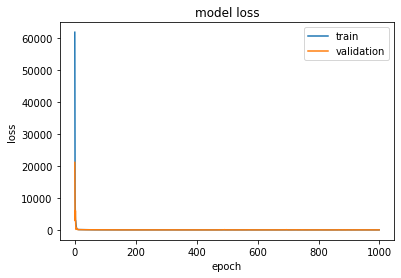

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
history = model.evaluate(X_test, y_test)
print(model.metrics_names)
metrics=["accuracy"];
y_test

19/19 [==============================] - 0s 1ms/step - loss: 96.0224 - mse: 96.0224
['loss', 'mse']


1839    256.77
3128    269.66
3483    273.21
915     247.49
3863    277.01
         ...  
1873    257.11
1501    253.39
471     242.88
2684    265.22
1805    256.43
Name: elev, Length: 596, dtype: float64